### Question – 3 (Using Python)

**5. Generate a matrix of charts with 2 rows and 5 columns (max.) containing the scatter plots of top 5 variable pairs that show positive correlation (1st row) and top 5 variable pairs that show negative correlation (2nd row)**

***Answer***

The code below identifies the top 5 positive and top 5 negative correlations between variables, then creates scatter charts. The top row shows the 5 positive correlations, and the second row displays the 5 negative correlations.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


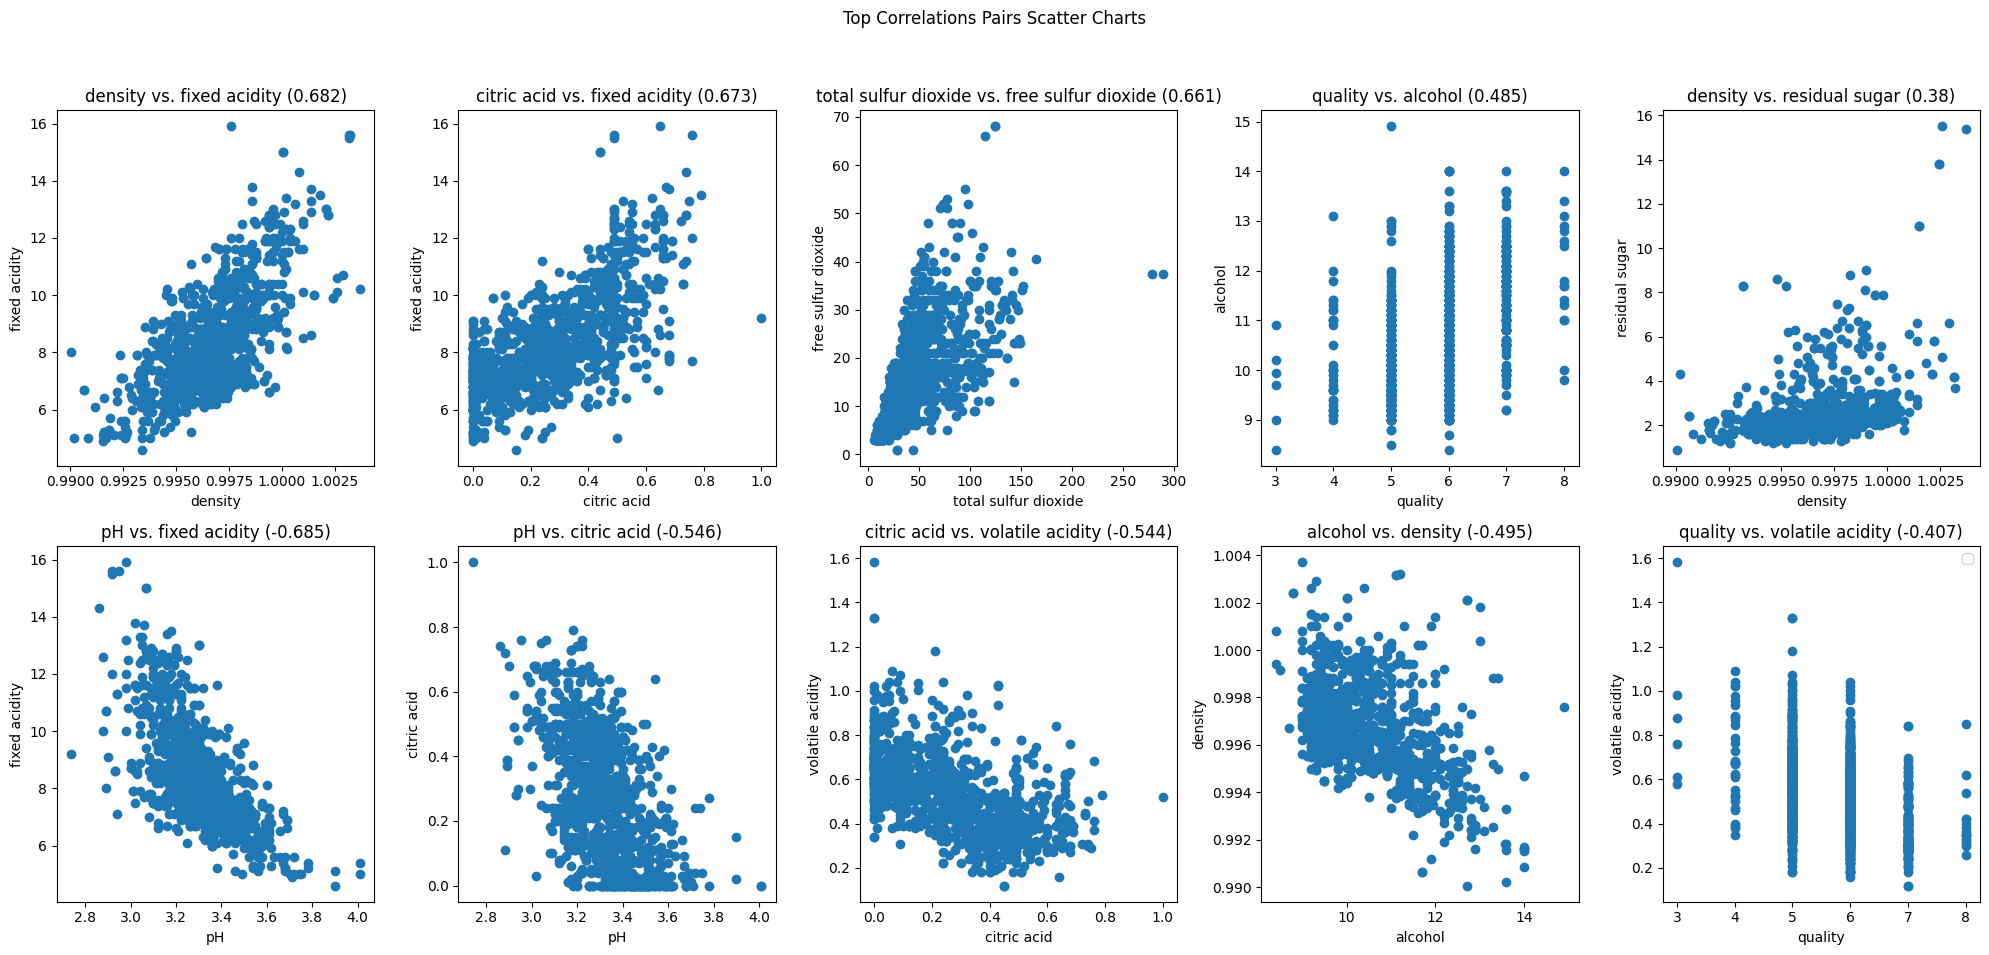

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
################################################################################################################
# Read data
data = pd.read_csv("../data/question_3.csv")
################################################################################################################
# return flatten list for the lower triangle of the given matrix 
def flatten_matrix_lower_triangle(mtx_df):
    rows = np.array(mtx_df.index)
    columns = np.array(mtx_df.columns)
    flat_corr =[]
    for i in range(len(rows)):
        for j in range(len(columns)):
            if j >= i:
                break
            flat_corr.append((rows[i], columns[j], mtx_df.at[rows[i], columns[j]]))
    return flat_corr

    
# exclude Id
data = data.drop(columns=['Id'], axis=1)
# Pearson's correlation coefficients
correlations = data.corr()
# takes lower triangle of the correlations matrix 
lower_triangle_correlations = flatten_matrix_lower_triangle(correlations)
positive_correlations = [x for x in lower_triangle_correlations if x[2] > 0]
negative_correlations = [x for x in lower_triangle_correlations if x[2] < 0]
# sort the correlations
sorted_positive_correlations = sorted(positive_correlations, key=lambda x: x[2], reverse=True)
sorted_negative_correlations = sorted(negative_correlations, key=lambda x: x[2], reverse=False)
# take top 5 correlations
top_5_positive_correlation = sorted_positive_correlations[:6]
top_5_negative_correlation = sorted_negative_correlations[:6]
# format correlation coefficients
top_5_positive_correlations = list(map(lambda entry: (entry[0], entry[1], round(entry[2], 3)), top_5_positive_correlation))
top_5_negative_correlations = list(map(lambda entry: (entry[0], entry[1], round(entry[2], 3)), top_5_negative_correlation))

####

# 2x5 grid of scatter charts
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Top Correlations Pairs Scatter Charts')

# top 5 positive correlations scatters
for c in range(5):
    # axes[0, c].hist(data[columns[column_indix]], bins=10, color='skyblue')
    axes[0, c].scatter(data[top_5_positive_correlations[c][0]], data[top_5_positive_correlations[c][1]])
    axes[0, c].set_title(f"{top_5_positive_correlations[c][0]} vs. {top_5_positive_correlations[c][1]} ({top_5_positive_correlations[c][2]})")
    axes[0, c].set_xlabel(f"{top_5_positive_correlations[c][0]}")
    axes[0, c].set_ylabel(f"{top_5_positive_correlations[c][1]}")
 
# top 5 negative correlations scatters
for c in range(5):
    # axes[0, c].hist(data[columns[column_indix]], bins=10, color='skyblue')
    axes[1, c].scatter(data[top_5_negative_correlations[c][0]], data[top_5_negative_correlations[c][1]])
    axes[1, c].set_title(f"{top_5_negative_correlations[c][0]} vs. {top_5_negative_correlations[c][1]} ({top_5_negative_correlations[c][2]})")
    axes[1, c].set_xlabel(f"{top_5_negative_correlations[c][0]}")
    axes[1, c].set_ylabel(f"{top_5_negative_correlations[c][1]}")
# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(loc='best')
# Display the plot
plt.savefig('../output/question_3_5_correlations_scatters.png', bbox_inches='tight')


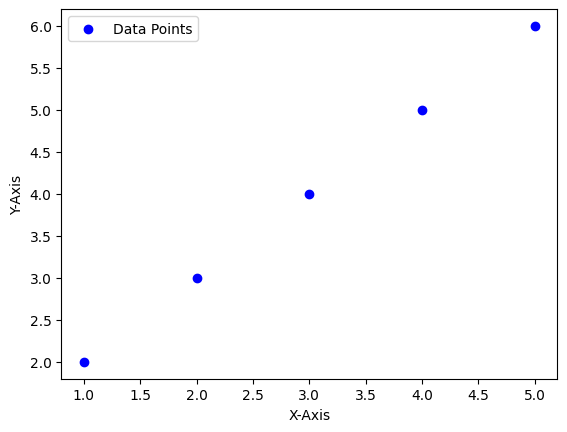

In [10]:
import matplotlib.pyplot as plt

# Sample data for the scatter plot
x = [1, 2, 3, 4, 5]
y = [2, 3, 4, 5, 6]

# Scatter plot with a legend
plt.scatter(x, y, label="Data Points", color='blue', marker='o')

# Set labels for the x and y axes
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

# Add a legend
plt.legend(loc='best')  # 'best' automatically selects the best location for the legend

# Show the plot
plt.show()